In [2]:
from keras.preprocessing import sequence
from keras.preprocessing import text
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding, LSTM, Bidirectional
from keras.layers import Conv1D, Flatten
from keras.preprocessing import text
from keras.models import Sequential,Model
from keras.layers import Dense ,Activation,MaxPool1D,Conv1D,Flatten,Dropout,Activation,Dropout,Input,Lambda,concatenate
from keras.utils import np_utils
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
import nltk
import csv
import pandas as pd

from keras.preprocessing import text as keras_text, sequence as keras_seq

In [3]:
data = pd.read_csv('drive/My Drive/ML Internship IIIT Dharwad/train.csv')
pd.set_option('display.max_colwidth',80)
data.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in share market in india?,What is the step by step guide to invest in share market?,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Diamond?,What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) d...,0
2,2,5,6,How can I increase the speed of my internet connection while using a VPN?,How can Internet speed be increased by hacking through DNS?,0
3,3,7,8,Why am I mentally very lonely? How can I solve it?,"Find the remainder when [math]23^{24}[/math] is divided by 24,23?",0
4,4,9,10,"Which one dissolve in water quikly sugar, salt, methane and carbon di oxide?",Which fish would survive in salt water?,0


In [4]:
data.shape

(404290, 6)

In [5]:
print(data.dtypes)
print(data['question1'].dtypes)
print(data['question2'].dtypes)
type(data['question1'])

id               int64
qid1             int64
qid2             int64
question1       object
question2       object
is_duplicate     int64
dtype: object
object
object


pandas.core.series.Series

# Setting target or labelfor each input

In [6]:
label_oneDimension=data['is_duplicate']

In [7]:
label_oneDimension.head(2)

0    0
1    0
Name: is_duplicate, dtype: int64

In [8]:
import numpy as np
from keras.utils.np_utils import to_categorical
label_twoDimension = to_categorical(data['is_duplicate'], num_classes=2)

In [9]:
label_twoDimension[0:1]

array([[1., 0.]], dtype=float32)

In [10]:
question_one=data['question1'].astype(str)
print(question_one.head())

0              What is the step by step guide to invest in share market in india?
1                             What is the story of Kohinoor (Koh-i-Noor) Diamond?
2       How can I increase the speed of my internet connection while using a VPN?
3                              Why am I mentally very lonely? How can I solve it?
4    Which one dissolve in water quikly sugar, salt, methane and carbon di oxide?
Name: question1, dtype: object


In [11]:
question_two=data['question2'].astype(str)
print(question_two.head())

0                          What is the step by step guide to invest in share market?
1    What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) d...
2                        How can Internet speed be increased by hacking through DNS?
3                  Find the remainder when [math]23^{24}[/math] is divided by 24,23?
4                                            Which fish would survive in salt water?
Name: question2, dtype: object


# Reading test data and preprocessing

In [12]:
#Data reading
'''
data_test = pd.read_csv('drive/My Drive/Summer Internship 2020 July/My Test File/Sunil/test.csv')
data_test_sample=data_test.dropna()
#data_test_sample=data_test_sample.head(100)
data_test_sample.head()
'''

"\ndata_test = pd.read_csv('drive/My Drive/Summer Internship 2020 July/My Test File/Sunil/test.csv')\ndata_test_sample=data_test.dropna()\n#data_test_sample=data_test_sample.head(100)\ndata_test_sample.head()\n"

In [13]:
'''
question_one_test=data_test_sample['question1'].astype(str)
print(question_one_test.head())
'''

"\nquestion_one_test=data_test_sample['question1'].astype(str)\nprint(question_one_test.head())\n"

In [14]:
'''
question_two_test=data_test_sample['question2'].astype(str)
print(question_two_test.head())
'''

"\nquestion_two_test=data_test_sample['question2'].astype(str)\nprint(question_two_test.head())\n"

# Fitting text on a single tokenized object

In [15]:
from keras.preprocessing.text import Tokenizer
tok_all = Tokenizer(filters='!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~', lower=True, char_level = False)
tok_all.fit_on_texts(question_one+question_two)
#tok_all.fit_on_texts(question_one+question_two+question_one_test+question_two_test)

In [16]:
vocabulary_all=len(tok_all.word_counts)
print(vocabulary_all)

89983


## **Train data Sequencing and Encoding**

In [17]:
#Encoding question 1
encoded_q1=tok_all.texts_to_sequences(question_one)
print(question_one[0])
encoded_q1[0]

What is the step by step guide to invest in share market in india?


[2, 3, 1, 1222, 59, 1222, 2566, 7, 579, 8, 763, 384, 8, 36]

In [18]:
#Encoding question 2
encoded_q2=tok_all.texts_to_sequences(question_two)
print(question_two[0])
encoded_q2[0]

What is the step by step guide to invest in share market?


[2, 3, 1, 1222, 59, 1222, 2566, 7, 579, 8, 763, 384]

# Pre-Padding on Train data

In [19]:
#####Padding encoded sequence of words
from keras.preprocessing import sequence
max_length=100
padded_docs_q1 = sequence.pad_sequences(encoded_q1, maxlen=max_length, padding='pre')

In [20]:
#####Padding encoded sequence of words
from keras.preprocessing import sequence
max_length=100
padded_docs_q2 = sequence.pad_sequences(encoded_q2, maxlen=max_length, padding='pre')

# Encoding on Test data

In [21]:
'''
#Encoding question 1
encoded_q1_test=tok_all.texts_to_sequences(question_one_test)
print(question_one_test[0])
encoded_q1_test[0]
'''

'\n#Encoding question 1\nencoded_q1_test=tok_all.texts_to_sequences(question_one_test)\nprint(question_one_test[0])\nencoded_q1_test[0]\n'

In [22]:
'''#Encoding question 1
encoded_q2_test=tok_all.texts_to_sequences(question_two_test)
print(question_two_test[0])
encoded_q2_test[0]'''

'#Encoding question 1\nencoded_q2_test=tok_all.texts_to_sequences(question_two_test)\nprint(question_two_test[0])\nencoded_q2_test[0]'

# Pre-Padding on test data

In [23]:
'''#####Padding encoded sequence of words
padded_docs_q1_test = sequence.pad_sequences(encoded_q1_test, maxlen=max_length, padding='pre')
padded_docs_q2_test = sequence.pad_sequences(encoded_q2_test, maxlen=max_length, padding='pre')'''

"#####Padding encoded sequence of words\npadded_docs_q1_test = sequence.pad_sequences(encoded_q1_test, maxlen=max_length, padding='pre')\npadded_docs_q2_test = sequence.pad_sequences(encoded_q2_test, maxlen=max_length, padding='pre')"

# Reading Embedding Vector from Glove

In [24]:
import os
import numpy as np

In [25]:
embeddings_index = {}
f = open('drive/My Drive/ML Internship IIIT Dharwad/Copy of glove.6B.300d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

Loaded 400000 word vectors.


In [26]:
#create embedding matrix

embedding_matrix = np.zeros((vocabulary_all+1, 300))
for word, i in tok_all.word_index.items():
	embedding_vector = embeddings_index.get(word)
	if embedding_vector is not None:
		# words not found in embedding index will be all-zeros.
		embedding_matrix[i] = embedding_vector

# Defining Input Shape for Model

In [27]:
Question1_shape= Input(shape=[max_length])
Question1_shape.shape

TensorShape([None, 100])

In [28]:
Question2_shape= Input(shape=[max_length])
Question2_shape.shape

TensorShape([None, 100])

# Bi-lstm Network

In [29]:
Bi_lstm1_network = Sequential()

# Adding Embedding layer
Bi_lstm1_network.add(Embedding(vocabulary_all+1,300,weights=[embedding_matrix], input_length=max_length, trainable=False))          

# Adding 1 Bi-Lstm layers
Bi_lstm1_network.add(Bidirectional(LSTM(32, return_sequences=False)))
Bi_lstm1_network.add(Dropout(0.2))

# Adding Dense layer
Bi_lstm1_network.add(Dense(128,activation="linear"))
Bi_lstm1_network.add(Dropout(0.3))
                       
              

# Printing Model summary

In [30]:
Bi_lstm1_network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 300)          26995200  
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                85248     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 128)               8320      
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
Total params: 27,088,768
Trainable params: 93,568
Non-trainable params: 26,995,200
_________________________________________________________________


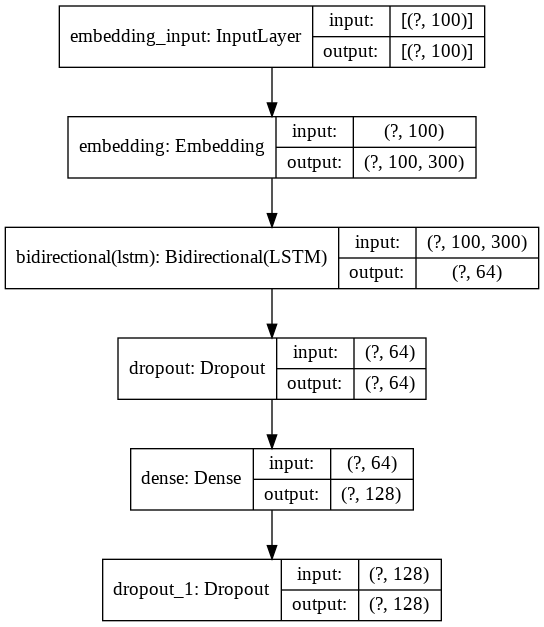

In [31]:
from keras.utils.vis_utils import plot_model
plot_model(Bi_lstm1_network, to_file='Bi_lstm1_network.png', show_shapes=True, show_layer_names=True)

# create siamese network from CNN model and store output feature vectors

In [32]:
Question1_Bi_lstm_feature=Bi_lstm1_network(Question1_shape)
Question2_Bi_lstm_feature=Bi_lstm1_network(Question2_shape)

# Adding and multiplying features obtained from Siamese CNN network

In [33]:
from keras import backend as K
from keras.optimizers import Adam

In [34]:
lamda_function=Lambda(lambda tensor:K.abs(tensor[0]-tensor[1]),name="Absolute_distance")
abs_distance_vector=lamda_function([Question1_Bi_lstm_feature,Question2_Bi_lstm_feature])

lamda_function2=Lambda(lambda tensor:K.abs(tensor[0]*tensor[1]),name="Hamadard_multiplication") #abs() returns absolute value
hamadard_vector=lamda_function2([Question1_Bi_lstm_feature,Question2_Bi_lstm_feature])

# Adding abs_distance_vector and hamadard_vector

In [35]:
from keras.layers import Add

In [36]:
added_vecotr = Add()([abs_distance_vector, hamadard_vector])

# Final Model prediction

In [37]:
predict=Dense(2,activation="sigmoid")(added_vecotr)

# Creating sequential model using Model() class and compilation

In [38]:
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
Siamese1_Network=Model(inputs=[Question1_shape,Question2_shape],outputs=predict)
Siamese1_Network.compile(loss = "binary_crossentropy", optimizer=Adam(lr=0.00003), metrics=["accuracy"])

In [39]:
Siamese1_Network.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 100)]        0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 100)]        0                                            
__________________________________________________________________________________________________
sequential (Sequential)         (None, 128)          27088768    input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
Absolute_distance (Lambda)      (None, 128)          0           sequential[0][0]      

# Plot model

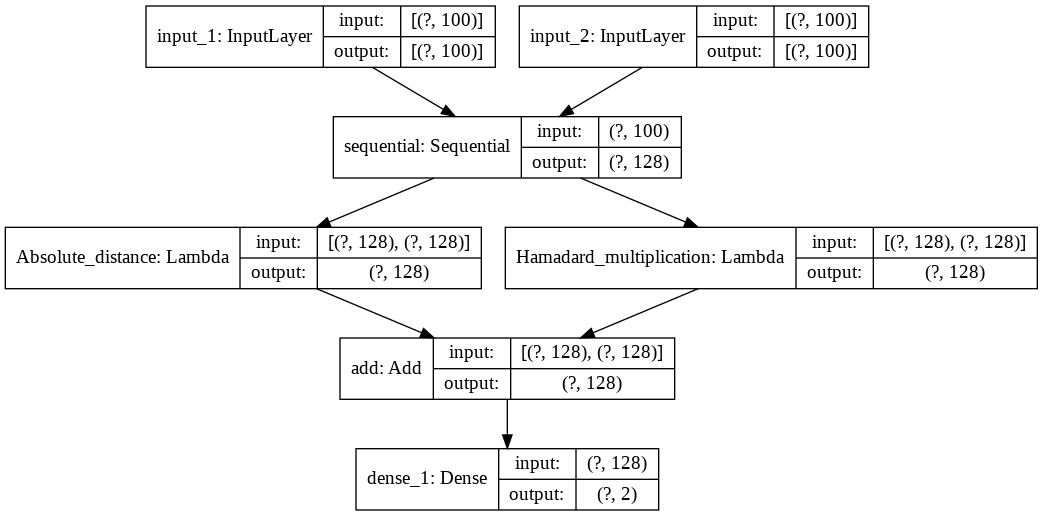

In [40]:
from keras.utils import plot_model
plot_model(Siamese1_Network, to_file='Siamese1_Network.png',show_shapes=True, show_layer_names=True)

# Setting hyperparameter for training

In [41]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau,ModelCheckpoint
earlystopper = EarlyStopping(patience=8, verbose=1)
#checkpointer = ModelCheckpoint(filepath = 'cnn_model_one_.{epoch:02d}-{val_loss:.6f}.hdf5',
 #                              verbose=1,
 #                              save_best_only=True, save_weights_only = True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.9,
                              patience=2, min_lr=0.00001, verbose=1)

# SMOTE Sample data Generation

In [42]:
'''from collections import Counter
from imblearn.over_sampling import SMOTE 
x = data[['id','qid1','qid2','question1','question2']]
y = data['is_duplicate']

# Increase the no of duplicate question pair samples from 149263 to 255027

sm = SMOTE(random_state=42,ratio={1:255027})
padded_docs_q1_SM, label_oneD_val = sm.fit_sample(x, y)
print('SMOTE dataset shape {}'.format(Counter(label_oneD_val)))'''

"from collections import Counter\nfrom imblearn.over_sampling import SMOTE \nx = data[['id','qid1','qid2','question1','question2']]\ny = data['is_duplicate']\n\n# Increase the no of duplicate question pair samples from 149263 to 255027\n\nsm = SMOTE(random_state=42,ratio={1:255027})\npadded_docs_q1_SM, label_oneD_val = sm.fit_sample(x, y)\nprint('SMOTE dataset shape {}'.format(Counter(label_oneD_val)))"

# Data split into train and validation set

In [43]:
# Splitting data into train and test
from sklearn.model_selection import train_test_split
q1_train, q1_val,q2_train, q2_val, label_train, label_val, label_oneD_train, label_oneD_val = train_test_split(padded_docs_q1,padded_docs_q2, label_twoDimension, label_oneDimension, test_size=0.30,
random_state=42)

# all 70% of training data for model

print("Number of question pair q1_train dataset: ", q1_train.shape)
print("Number of question pair q2_train dataset: ", q2_train.shape)
print("Number of question pair label_train dataset: ", label_train.shape)
print("Number of question pair label_oneD_train dataset: ", label_oneD_train.shape)
print("===================================================================")

# all 70% of testing data for model

print("Number of question pair q1_val dataset: ", q1_val.shape)
print("Number of question pair q2_val dataset: ", q2_val.shape)
print("Number of question pair label_val dataset: ", label_val.shape)
print("Number of question pair label_oneD_val dataset: ", label_oneD_val.shape)


Number of question pair q1_train dataset:  (283003, 100)
Number of question pair q2_train dataset:  (283003, 100)
Number of question pair label_train dataset:  (283003, 2)
Number of question pair label_oneD_train dataset:  (283003,)
Number of question pair q1_val dataset:  (121287, 100)
Number of question pair q2_val dataset:  (121287, 100)
Number of question pair label_val dataset:  (121287, 2)
Number of question pair label_oneD_val dataset:  (121287,)


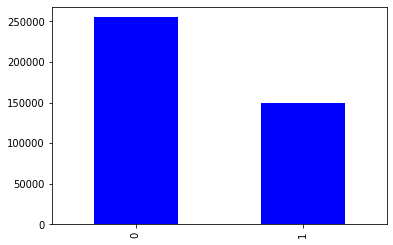

In [60]:
import matplotlib.pyplot as plt
import pandas as pd
data['is_duplicate'].value_counts().plot(kind='bar', color='blue')

# SMOTE sample dataset generation

In [44]:
'''X = np.array(data.iloc[:, data.columns != 'is_duplicate'])
y = np.array(data.iloc[:, data.columns == 'is_duplicate'])
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))'''

Shape of X: (404290, 5)
Shape of y: (404290, 1)


In [45]:
'''l = data[['question1','question2']]
m = data[['is_duplicate']]

l_train, l_test, m_train, m_test = train_test_split(l, m, test_size=0.3, random_state=0)

print("Number transactions l_train dataset: ", l_train.shape)
print("Number transactions m_train dataset: ", m_train.shape)
print("=======================================================")
print("Number transactions l_test dataset: ", l_test.shape)
print("Number transactions m_test dataset: ", m_test.shape)'''


Number transactions l_train dataset:  (283003, 2)
Number transactions m_train dataset:  (283003, 1)
Number transactions l_test dataset:  (121287, 2)
Number transactions m_test dataset:  (121287, 1)


In [58]:

'''from collections import Counter
from imblearn.over_sampling import SMOTE

#print("Before OverSampling, counts of label '1': {}".format(Counter(m_train==1)))
#print("Before OverSampling, counts of label '0': {} \n".format(sum(m_train==0)))

sm = SMOTE(random_state=42)
l_train_res, m_train_res = sm.fit_sample(l_train, m_train)

#print('After OverSampling, the shape of train_l: {}'.format(l_train_res.shape))
#print('After OverSampling, the shape of train_m: {} \n'.format(m_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(m_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(m_train_res==0)))'''

ValueError: ignored

# Model fitting or training

In [ ]:
history = Siamese1_Network.fit([q1_train,q2_train],label_train,
                    batch_size=32,epochs=100,validation_data=([q1_val,q2_val],label_val),callbacks=[earlystopper, reduce_lr])

# Model Prediction

In [ ]:
Siamese1_Network_predictions = Siamese1_Network.predict([q1_val,q2_val])
#Siamese1_Network_predictions = Siamese1_Network.predict([padded_docs_q1_test,padded_docs_q2_test])

In [ ]:
#Siamese1_Network_predictions_testData = Siamese1_Network.predict([padded_docs_q1_test,padded_docs_q1_test])

# Log loss

In [ ]:
from sklearn.metrics import log_loss
log_loss_val= log_loss(label_val,Siamese1_Network_predictions)
log_loss_val

# Classification report

In [ ]:
predictions = np.zeros_like(Siamese1_Network_predictions)
predictions[np.arange(len(Siamese1_Network_predictions)), Siamese1_Network_predictions.argmax(1)] = 1


In [ ]:
predictionInteger=(np.argmax(predictions, axis=1))
#print('np.argmax(a, axis=1): {0}'.format(np.argmax(predictions, axis=1)))
predictionInteger

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(label_val,predictions))

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
print ("Precision, Recall, F1_score : macro ",precision_recall_fscore_support(label_oneD_val,predictionInteger, average='macro'))
print ("Precision, Recall, F1_score : micro ",precision_recall_fscore_support(label_oneD_val,predictionInteger, average='micro'))
print ("Precision, Recall, F1_score : weighted ",precision_recall_fscore_support(label_oneD_val,predictionInteger, average='weighted'))

# Final train and val loss

In [ ]:
min_val_loss = min(history.history["val_loss"])
min_train_loss = min(history.history["loss"])
max_val_acc = max(history.history["val_accuracy"])
max_train_acc = max(history.history["accuracy"])
print("min_train_loss=%g, min_val_loss=%g, max_train_acc=%g, max_val_acc=%g" % (min_train_loss,min_val_loss,max_train_acc,max_val_acc))

# Plot epoch Vs loss

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history["loss"],color = 'red', label = 'train_loss')
plt.plot(history.history["val_loss"],color = 'blue', label = 'val_loss')
plt.title('Loss Visualisation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('1Layer_CNN_lossPlot_siamese.pdf',dpi=1000)

from google.colab import files
files.download('1Layer_CNN_lossPlot_siamese.pdf') 

# Plot Epoch Vs Accuracy

In [ ]:
plt.plot(history.history["accuracy"],color = 'red', label = 'train_accuracy')
plt.plot(history.history["val_accuracy"],color = 'blue', label = 'val_accuracy')
plt.title('Accuracy Visualisation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('1Layer_CNN_accuracyPlot_siamese.pdf',dpi=1000)
files.download('1Layer_CNN_accuracyPlot_siamese.pdf') 

# Area Under Curve- ROC

In [ ]:
#pred_test = Siamese1_Network.predict([padded_docs_q1_test,padded_docs_q2_test])
pred_train = Siamese1_Network.predict([q1_train,q2_train])
pred_val = Siamese1_Network.predict([q1_val,q2_val])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

def plot_AUC_ROC(y_true, y_pred):
    n_classes = 2 #change this value according to class value

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_true.ravel(), y_pred.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
############################################################################################
    lw = 2
    # Compute macro-average ROC curve and ROC area

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure()
    
    plt.plot(fpr["micro"], tpr["micro"],
            label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
            color='deeppink', linestyle=':', linewidth=4)

    plt.plot(fpr["macro"], tpr["macro"],
            label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
            color='navy', linestyle=':', linewidth=4)
    
    colors = cycle(['aqua', 'darkorange'])
    #classes_list1 = ["DE","NE","DK"]
    classes_list1 = ["Non-duplicate","Duplicate"]
    for i, color,c in zip(range(n_classes), colors,classes_list1):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                label='{0} (AUC = {1:0.2f})'
                ''.format(c, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic curve')
    plt.legend(loc="lower right")
    #plt.show()
    plt.savefig('1Layer_CNN_RocPlot_siamese.pdf',dpi=1000)
    files.download('1Layer_CNN_RocPlot_siamese.pdf')

    # Plot of a ROC curve for a specific class
    '''
    plt.figure()
    lw = 2
    plt.plot(fpr[0], tpr[0], color='darkorange',
            lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[0])
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    '''

In [ ]:
plot_AUC_ROC(label_val,pred_val)

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score

In [ ]:
auc_val = roc_auc_score(label_val,pred_val)
accuracy_val = accuracy_score(label_val,pred_val>0.5)
auc_train = roc_auc_score(label_train,pred_train)
accuracy_train = accuracy_score(label_train,pred_train>0.5)

print("auc_train=%g, auc_val=%g, accuracy_train=%g, accuracy_val=%g" % (auc_train, auc_val, accuracy_train, accuracy_val))

In [ ]:
'''
fpr_train, tpr_train, thresholds_train = roc_curve(label_train,pred_train)
fpr_test, tpr_test, thresholds_test = roc_curve(label_val,pred_val)

#fpr_train, tpr_train, thresholds_train = roc_curve(label_oneD_train,pred_train_final)
#fpr_test, tpr_test, thresholds_test = roc_curve(label_oneD_val,pred_val_final)

plt.plot(fpr_train,tpr_train, color="blue", label="train roc, auc=%g" % (auc_train,))
plt.plot(fpr_test,tpr_test, color="green", label="val roc, auc=%g" % (auc_val,))

plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')
plt.savefig('AUC_CURVE_cnn4.pdf',dpi=1000)
#files.download('AUC_CURVE_cnn4.pdf')
'''